<a href="https://colab.research.google.com/github/clepigdo/Latihan_STKI2025/blob/main/WordEmbedding_dan_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Sedang melatih model...
Model selesai dilatih!

Vektor 'kucing' (5 dimensi awal): [-0.00872748  0.00213016 -0.00087354 -0.00931909 -0.00942814]

Kata yang paling mirip dengan 'kucing':
- mengubah: 0.1669
- suka: 0.1389
- anjing: 0.1315

Kemiripan 'kucing' vs 'anjing': 0.1315

Membuat Visualisasi...


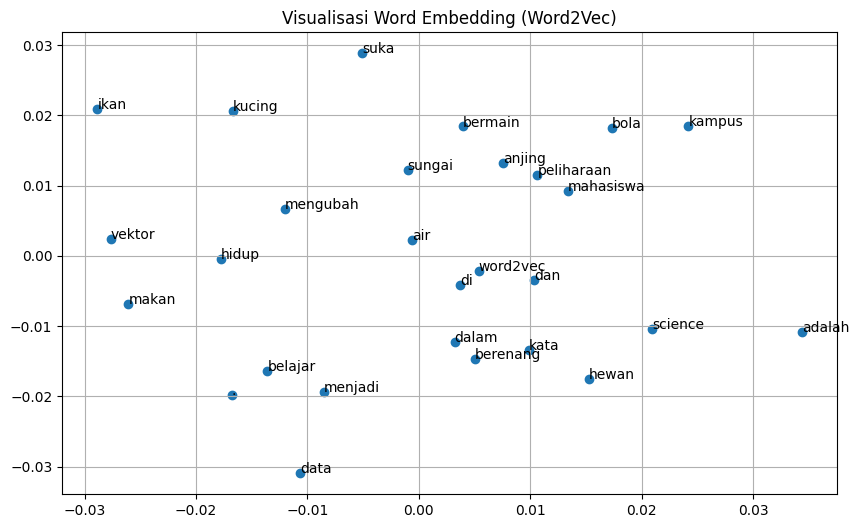

In [5]:
# ==========================================
# 1. SETUP & INSTALASI
# ==========================================
!pip install gensim nltk matplotlib scikit-learn

import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Abaikan warning agar output bersih
warnings.filterwarnings(action='ignore')

# Download resource NLTK (Termasuk perbaikan error 'punkt_tab')
nltk.download('punkt')
nltk.download('punkt_tab')

# ==========================================
# 2. DATA & PREPROCESSING
# ==========================================
# Data teks dummy
text = """
Kucing suka makan ikan.
Anjing suka bermain bola.
Kucing dan anjing adalah hewan peliharaan.
Ikan hidup di dalam air.
Mahasiswa belajar data science di kampus.
Word2Vec mengubah kata menjadi vektor.
Ikan berenang di sungai.
"""

# Tokenisasi (Kalimat -> Kata)
data = []
for sentence in sent_tokenize(text):
    temp = []
    for word in word_tokenize(sentence):
        temp.append(word.lower()) # Ubah ke huruf kecil
    data.append(temp)

# ==========================================
# 3. TRAINING MODEL WORD2VEC
# ==========================================
print("Sedang melatih model...")
# vector_size: dimensi vektor, window: jarak konteks, min_count: minimal muncul
model = Word2Vec(data, vector_size=100, window=5, min_count=1, workers=4)
print("Model selesai dilatih!\n")

# ==========================================
# 4. PENGUJIAN (TESTING)
# ==========================================
target_word = 'kucing'
if target_word in model.wv:
    # A. Lihat Vektor (5 angka pertama)
    print(f"Vektor '{target_word}' (5 dimensi awal): {model.wv[target_word][:5]}")

    # B. Kata paling mirip
    print(f"\nKata yang paling mirip dengan '{target_word}':")
    similar = model.wv.most_similar(target_word, topn=3)
    for w, s in similar:
        print(f"- {w}: {s:.4f}")

    # C. Cek kemiripan dua kata spesifik
    word_b = 'anjing'
    if word_b in model.wv:
        sim = model.wv.similarity(target_word, word_b)
        print(f"\nKemiripan '{target_word}' vs '{word_b}': {sim:.4f}")

# ==========================================
# 5. VISUALISASI (PLOT GRAFIK)
# ==========================================
print("\nMembuat Visualisasi...")

# Ambil semua kata dan vektornya
words = list(model.wv.index_to_key)
X = model.wv[words]

# Kurangi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("Visualisasi Word Embedding (Word2Vec)")
plt.grid(True)
plt.show()

Error: File model tidak ditemukan. Silakan upload file .model terlebih dahulu.


NameError: name 'new_model' is not defined